# Padé and gravity

This notebook demonstrates how Padé approximants may be used to recover the gravitation potential.

In [13]:
import mpmath as mp
import matplotlib.pyplot as plt
import numpy as np
import math

mp.dps = 15; mp.pretty = True


In [14]:
masses = [(2,3,1), (-3,3,1)]
breuillon = max([math.sqrt(x**2 + y**2) for (x,y,m) in masses])
R = breuillon + 1.5
graph_radius = 2*breuillon

N = 35
fourier_terms = 2*N+1

In [20]:
def memoize(f):
    memo = {}
    def helper(x):
        if x not in memo:            
            memo[x] = f(x)
        return memo[x]
    return helper

In [24]:
def point_mass(x,y,mx,my,m):
    denom = math.sqrt((x-mx)**2 + (y-my)**2)
    if (abs(denom) < 0.0001):
        return 0
    return m/denom

def potential(x,y):
    return sum([point_mass(x,y,mx,my,m) for (mx,my,m) in masses])

def truth(theta, r):
    return potential( r*math.cos(theta), r*math.sin(theta) )

@memoize
def taylor_at_angle(theta):
    return [sum([ (math.sqrt((mx**2 + my**2))/R)**(n) * mp.legendre(n, math.cos(theta-math.atan2(my,mx))) for (mx,my,m) in masses])  for n in range(fourier_terms)]

@memoize
def taylor_at_angle_fourier(theta):
    taylor_coefficients = []
    c = cs[0]
    s = cs[1]
    m = 2*pi/(I[1] - I[0])
    for k in range(len(c)):
        taylor_coefficients.append( c[k]*math.cos(k*m*theta) + s[k]*math.sin(k*m*theta) )
    return taylor_coefficients

@memoize
def pade_at_angle(theta):
    return mp.pade( taylor_at_angle(theta), N, N )

def dc_from_taylor(tt, r):
    return mp.polyval(tt[::-1], R/r) / r

def dc_from_pade(pq, r):
    p, q = pq
    return mp.polyval(p[::-1], R/r)/mp.polyval(q[::-1], R/r) / r

def difference(theta, r):
    if theta == 0 or theta == pi:
        return 0
    pq = pade_at_angle(theta)
    return abs(dc_from_pade(pq, r) - truth( theta, r )) / truth( theta, r )

def difference_taylor(theta, r):
    if theta == 0 or theta == pi:
        return 0
    tt = taylor_at_angle(theta)
    return abs(dc_from_taylor(tt, r) - truth( theta, r )) / truth( theta, r )

a = np.linspace(0,2*np.pi,37)
b = np.linspace(0,float(graph_radius),20)
A, B = np.meshgrid(a, b)

def bounded(t):
    if t> 1:
        return 1
    if t <-1:
        return -1
    return t

def taylor(theta,r):
    try:
        return dc_from_taylor(taylor_at_angle(theta),r)
    except ZeroDivisionError as error:
        return 0
    
def dc_pade(theta,r):
    try:
        result = dc_from_pade(pade_at_angle(theta),r)
        return result
    except ZeroDivisionError as error:
        return 0

def truth_not_zero(theta,r):
    return truth(theta,r)

<IPython.core.display.Javascript object>


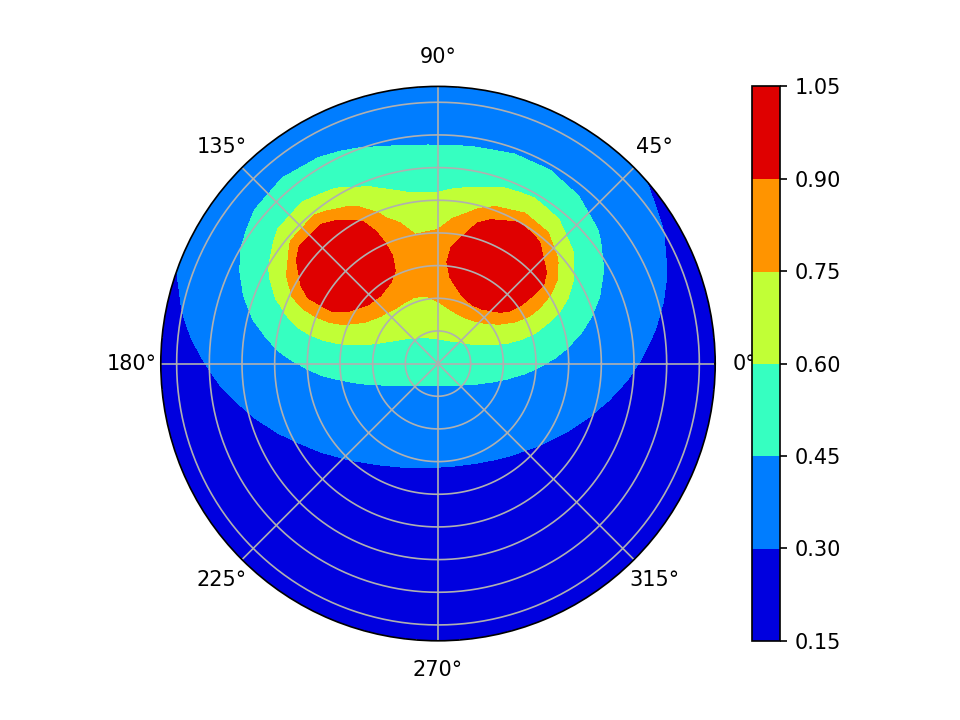

<module 'matplotlib.pyplot' from '/nix/store/256gb6bnswi5sgd3wp3qlddcnfggggi8-python3-3.7.1-env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [27]:
%matplotlib notebook

#c = [[bounded(abs(dc_pade(x,y))) for x in a] for y in b]
#c = [[bounded(abs(taylor(x,y))) for x in a] for y in b]
#c = [[bounded(abs(taylor(x,y)) - abs(truth_not_zero(x,y))) for x in a] for y in b]
c = [[bounded(truth_not_zero(x,y)) for x in a] for y in b]

#actual plotting
import matplotlib.cm as cm
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(a, b, c, cmap=cm.jet)
plt.colorbar(ctf)

#xs = np.linspace(0,2*np.pi,15)
#xs = [i*pi/180.0 for i in range(30,330,6)]
#rs = np.arange(mountain_x/2,mountain_x*2,0.1)
#ys = [[float(difference(theta,r)) for theta in xs] for r in rs]
#r = 9
#r = R+2
#ys = [float(difference_taylor(theta,r)) for theta in xs]

#plt.imshow(ys,cmap='hot', interpolation='nearest')
#plt.show()

#plt.plot(xs, ys)
#plt.ylabel('difference')
#plt.xlabel('angle (in radians)')
plt
#plt.savefig("taylor-truth.pdf")


<module 'mpmath' (namespace)>

NameError: name 'mpmath' is not defined